# Fake News Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
# Shuffle the data
from sklearn.utils import shuffle
df_fake = shuffle(df_fake)
df_fake = df_fake.reset_index(drop=True)
df_fake.head(10)

,title,text,subject,date
0,JUST IN: DALLAS COWBOYS OWNER Jerry Jones Is L...,"Make no mistake about it, the NFL needs to sho...",left-news,"Oct 29, 2017"
1,"Trump Bares Himself at UNGA, “In a Kind of Neo...",President Trump speaking at the UNGA. (Photo:...,Middle-east,"September 20, 2017"
2,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,Government News,"Mar 12, 2017"
3,"BLACK WOMAN ATTACKS Man, His Car, Boat With Ha...",A black New Jersey woman who said she s sick ...,politics,"Apr 5, 2017"
4,Hannity Has A Complete MELTDOWN After Being C...,The son of Sonny and Cher successfully caused ...,News,"March 11, 2017"
5,CHARLIE DANIELS SENDS A MESSAGE To Bruce Sprin...,Charlie daniels is such a great man and a grea...,left-news,"Apr 17, 2016"
6,WHY FORD’S DARK SECRET May Come Back To Haunt ...,"Founder of the Ford Motor Company, Henry Ford,...",politics,"Oct 16, 2017"
7,"‘Responsible Gun Owner’ Road Rages, Threatens...",The National Rifle Association tells us that a...,News,"February 2, 2016"
8,WATCH: Trump Stumbles When Asked If He Would ...,Donald Trump sat down with for an interview wi...,News,"July 24, 2016"
9,Charles Koch Does A Brutally Honest Interview...,Charles Koch sat down with ABC News and did an...,News,"April 25, 2016"


In [4]:
# Shuffle the data
from sklearn.utils import shuffle
df_true = shuffle(df_true)
df_true = df_true.reset_index(drop=True)
df_true.head(10)

,title,text,subject,date
0,Indian state ruled by PM Modi's party defers m...,NEW DELHI (Reuters) - India s western state of...,worldnews,"October 24, 2017"
1,Comey had pushed for more resources for Russia...,WASHINGTON (Reuters) - FBI Director James Come...,politicsNews,"May 10, 2017"
2,U.S. lobbyist Tony Podesta leaves firm amid M...,WASHINGTON (Reuters) - Prominent Washington lo...,politicsNews,"October 30, 2017"
3,Trump administration blacklists three official...,WASHINGTON (Reuters) - The Trump administratio...,worldnews,"September 6, 2017"
4,"Trump interviews four for Fed chair job, to de...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 29, 2017"
5,"Forbidden in China, but Trump skirts 'Great Fi...",BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 9, 2017"
6,Saudi Arabia arrests 46 for stirring divisions...,DUBAI (Reuters) - Saudi authorities said on We...,worldnews,"October 4, 2017"
7,House Democrats expect to see intelligence doc...,WASHINGTON (Reuters) - Congressional intellige...,politicsNews,"April 5, 2017"
8,UK PM May's spokesman warns against 'speculati...,LONDON (Reuters) - A spokesman for British Pri...,worldnews,"December 6, 2017"
9,U.S. Senate intelligence chairman does not cal...,WASHINGTON (Reuters) - U.S. Senator Richard Bu...,politicsNews,"March 2, 2017"


## Inserting a column "class" as target feature

In [5]:
#fake = 0
#true = 1

df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Concatenate dataframes
df_conc = pd.concat([df_fake, df_true]).reset_index(drop = True)
df_conc.shape

(44898, 5)

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


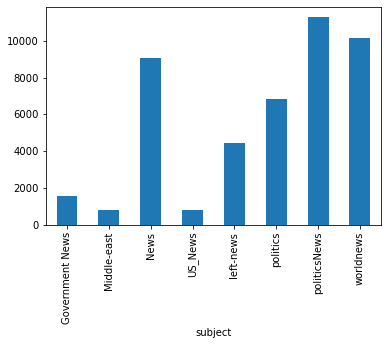

In [8]:
# How many articles per subject?
print(df_conc.groupby(['subject'])['text'].count())
df_conc.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [9]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-11-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-11-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,"Trudeau HUMILIATES Trump, Openly Prefers To S...","Canadian Prime Minister Justin Trudeau has, li...",News,"July 8, 2017",0
23472,SMILING HOST Shows Women How To Apply Make-Up ...,"This video was filmed on Moroccan television, ...",left-news,"Nov 28, 2016",0
23473,JUDGE NAPOLITANO On Bombshell That Intel Isn’t...,The officials decision to keep information ci...,politics,"Feb 16, 2017",0
23474,The NRA Just Got Caught In A Lie That Shatter...,Who can forget how emotional Wayne LaPierre wa...,News,"April 22, 2016",0
23475,LET’S MAKE A DEAL: CRUZ SUPER-PAC’S Will Make ...,Is this a deal Trump should take? If he walks ...,politics,"Jan 28, 2016",0
23476,OPEN-BORDER LIBERALS Put Entire Nation On High...,Thank you Angela Merkel German security servic...,left-news,"Feb 5, 2016",0
23477,President Trump’s Moving Pentagon Speech and C...,President Trump and First Lady Melania commemo...,politics,"Sep 11, 2017",0
23478,SHARIA COMPLIANT SWIMSUITS: As Spring Arrives ...,"Make no mistake, the Muslim European invaders ...",left-news,"Apr 10, 2016",0
23479,Flint’s #CrookedMayorWeaver Tells Trump He’s N...,Flint s Democrat Mayor Karen Weaver is throwin...,politics,"Sep 14, 2016",0
23480,VIOLENT ANTIFA THUGS WEAR MASKS To Hide Their ...,"Antifa is a violent, anti-fascist protest grou...",politics,"Sep 4, 2017",0


In [13]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,Pence trims Asia trip to deal with domestic pr...,"PAGO PAGO, American Samoa (Reuters) - U.S. Vic...",politicsNews,"April 24, 2017",1
21408,Long-stalled email privacy bill advances in Co...,WASHINGTON (Reuters) - Legislation that would ...,politicsNews,"April 13, 2016",1
21409,"After pointed criticism, Tillerson urges Gulf ...",WASHINGTON (Reuters) - The United States hopes...,politicsNews,"June 21, 2017",1
21410,New Russian envoy describes 'warm' meeting wit...,MOSCOW (Reuters) - Russia’s newly installed am...,politicsNews,"September 8, 2017",1
21411,Macron: France ready to strengthen force in Sa...,PARIS (Reuters) - President Emmanuel Macron sa...,worldnews,"December 23, 2017",1
21412,Hillary Clinton says U.S. threats of war with ...,SEOUL (Reuters) - Former U.S. presidential can...,worldnews,"October 18, 2017",1
21413,Russian long-range bombers hit Islamic State t...,MOSCOW (Reuters) - Six Russian long-range bomb...,worldnews,"December 5, 2017",1
21414,Zimbabwe opposition chief Tsvangirai suddenly ...,HARARE (Reuters) - Zimbabwe opposition leader ...,worldnews,"September 16, 2017",1
21415,China corruption could lead to Soviet-style co...,BEIJING (Reuters) - China must step up its bat...,worldnews,"November 15, 2017",1
21416,McCain to Trump on Russian hacking: 'The facts...,WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"December 11, 2016",1


In [14]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [15]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,JUST IN: DALLAS COWBOYS OWNER Jerry Jones Is L...,"Make no mistake about it, the NFL needs to sho...",left-news,"Oct 29, 2017",0
1,"Trump Bares Himself at UNGA, “In a Kind of Neo...",President Trump speaking at the UNGA. (Photo:...,Middle-east,"September 20, 2017",0
2,ENVIRONMENTAL TERRORISTS Videotape Themselves ...,The social media director for Trump called the...,Government News,"Mar 12, 2017",0
3,"BLACK WOMAN ATTACKS Man, His Car, Boat With Ha...",A black New Jersey woman who said she s sick ...,politics,"Apr 5, 2017",0
4,Hannity Has A Complete MELTDOWN After Being C...,The son of Sonny and Cher successfully caused ...,News,"March 11, 2017",0
5,CHARLIE DANIELS SENDS A MESSAGE To Bruce Sprin...,Charlie daniels is such a great man and a grea...,left-news,"Apr 17, 2016",0
6,WHY FORD’S DARK SECRET May Come Back To Haunt ...,"Founder of the Ford Motor Company, Henry Ford,...",politics,"Oct 16, 2017",0
7,"‘Responsible Gun Owner’ Road Rages, Threatens...",The National Rifle Association tells us that a...,News,"February 2, 2016",0
8,WATCH: Trump Stumbles When Asked If He Would ...,Donald Trump sat down with for an interview wi...,News,"July 24, 2016",0
9,Charles Koch Does A Brutally Honest Interview...,Charles Koch sat down with ABC News and did an...,News,"April 25, 2016",0


In [16]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [17]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Random Shuffling the dataframe

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
16829,Those of us in the swamp knew who the alligat...,0
18553,Criminal charges are coming down the line for ...,0
10955,We ve never passed racist laws in this country...,0
5224,,0
7475,All of the tracking polls keep holding at Tru...,0


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,Those of us in the swamp knew who the alligat...,0
1,Criminal charges are coming down the line for ...,0
2,We ve never passed racist laws in this country...,0
3,,0
4,All of the tracking polls keep holding at Tru...,0


## Creating a function to process the texts

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [25]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [26]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [30]:
pred_lr=LR.predict(xv_test)

In [31]:
LR.score(xv_test, y_test)

0.9873440285204991

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(y_test,pred_lr)
print(confusion_mat)

[[5807   72]
 [  70 5271]]


In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5879
           1       0.99      0.99      0.99      5341

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test)

0.9959893048128342

In [37]:
confusion_mat = confusion_matrix(y_test,pred_dt)
print(confusion_mat)

[[5863   16]
 [  29 5312]]


In [38]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5879
           1       1.00      0.99      1.00      5341

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [40]:
pred_gbc = GBC.predict(xv_test)

In [41]:
GBC.score(xv_test, y_test)

0.9962566844919786

In [42]:
confusion_mat = confusion_matrix(y_test,pred_gbc)
print(confusion_mat)

[[5851   28]
 [  14 5327]]


In [43]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5879
           1       0.99      1.00      1.00      5341

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
pred_rfc = RFC.predict(xv_test)

In [46]:
RFC.score(xv_test, y_test)

0.9890374331550802

In [47]:
confusion_mat = confusion_matrix(y_test,pred_rfc)
print(confusion_mat)

[[5831   48]
 [  75 5266]]


In [48]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5879
           1       0.99      0.99      0.99      5341

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [49]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [51]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - Legislation that would require law enforcement to obtain a search warrant before asking technology companies to hand over old emails unanimously moved forward in the U.S. House of Representatives on Wednesday, notching a long-awaited win for technology companies and digital privacy advocates. The House Judiciary Committee voted 28-0 to approve the Email Privacy Act, which would update a decades-old law to mandate federal authorities get a warrant to access emails or other digital communications that are more than 180 days old. Currently, law enforcement and civil agencies can ask a service provider to turn over such aged private communications with only a subpoena, which is subject to less judicial oversight than a warrant. House Majority Leader Kevin McCarthy said he planned to bring the bill to a full vote the week of April 25, boosting its chances to become law this year.  If the bill passes the House as expected, it will head to a gridlocked Senate, where mor